In [9]:
import os
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [10]:
IMG_SIZE = 224

train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


In [11]:
train_dir = "../data/raw/train"
val_dir   = "../data/raw/val"
test_dir  = "../data/raw/test"

train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
val_data   = datasets.ImageFolder(val_dir, transform=val_test_transforms)
test_data  = datasets.ImageFolder(test_dir, transform=val_test_transforms)

print("Train samples:", len(train_data))
print("Validation samples:", len(val_data))
print("Test samples:", len(test_data))


Train samples: 5216
Validation samples: 16
Test samples: 624


In [12]:
BATCH_SIZE = 32

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)


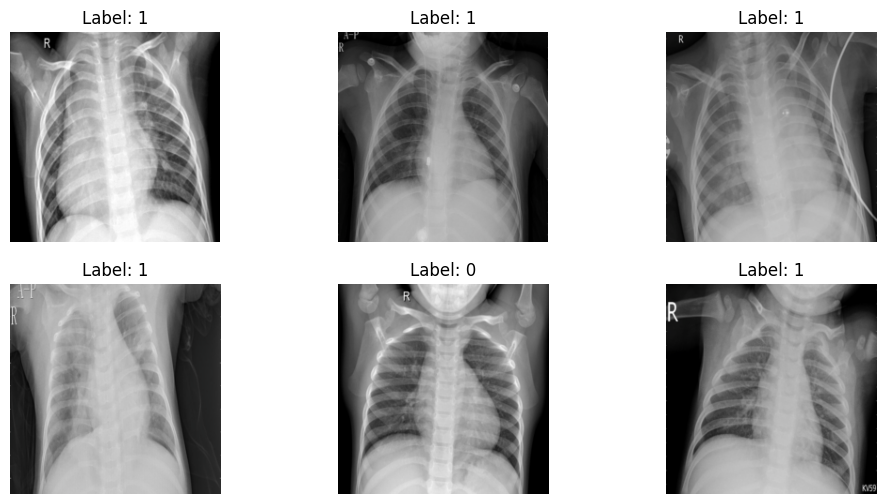

In [13]:
 # visualize transformed images

def show_batch(loader):
    images, labels = next(iter(loader))
    plt.figure(figsize=(12, 6))
    for i in range(6):
        img = images[i].permute(1, 2, 0).numpy()
        img = (img * np.array([0.229, 0.224, 0.225]) + 
               np.array([0.485, 0.456, 0.406]))  # denormalize
        img = np.clip(img, 0, 1)
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(f"Label: {labels[i].item()}")
        plt.axis("off")
    plt.show()

show_batch(train_loader)


In [14]:
import torch

torch.save(train_data, "train_data.pt")
torch.save(val_data, "val_data.pt")
torch.save(test_data, "test_data.pt")
